In [3]:
#Промежуточный проект. Скрипт
#Шаг 1. Чтение файлов+удаление дубликатов+конкатенация таблиц
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

customers_df=pd.read_csv('olist_customers_dataset.csv')
customers_clean=customers_df.drop_duplicates()
orders_df=pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
orders_clean=orders_df.drop_duplicates()
orders_items_df=pd.read_csv('olist_order_items_dataset.csv')
orders_items_clean=orders_items_df.drop_duplicates()

In [4]:
customers_clean.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers_clean.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
orders_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [7]:
orders_clean.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [8]:
orders_items_clean.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
orders_items_clean.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [10]:
#Шаг 2. Выполнение заданий. 
#Задание 1. Сколько у нас пользователей, которые совершили покупку только один раз?
#На основании имеющихся данных было принято следующее решение:
#Согласно многим источникам информации в интернете, у покупки есть несколько фаз. Финальная-это получение товара.
#Тогда наша задача отобрать товар со статусом доставлено (это конечный этап/фаза покупки)
deilvered_df=orders_clean.query("order_status=='delivered'")
deilvered_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [11]:
#Проверка на лишнее (лишних нет)
deilvered_df.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

In [12]:
#Далее собираем датафрейм-соединяем получившийся предыдущий датафрейм с датафреймом кастомерс_клин
#Затем создаю новый дф, где будут только необходимые колонки
#Далее провожу группировку по уникальным пользователям+функция count, а затем через query записываю условие
#Результат: 90557 пользователей сделали только один заказ
result=deilvered_df.merge(customers_clean, on='customer_id')
final=result[['order_id', 'customer_id', 'customer_unique_id', 'order_status']]
final=final.groupby(['customer_unique_id'], as_index=False)\
.agg({'order_id':'count'})
final=final.rename(columns={'order_id':'quantity'})
final=final.query("quantity==1")
final

,customer_unique_id,quantity
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


In [13]:
#Задание 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)
#В качестве даты выступает столбец order_purchase_timestamp
#Важно! здесь сначала отбираем статусы (все, кроме доставлен), а затем берём статусы, которых подходят под описание условия задачи
#к примеру-статус invoiced (выставлен счёт) не является причиной НЕДОСТАВЛЕНИЯ заказа...
#Сначала я вывел отдельные месяца, а затем приступил к отбору необходимых данных
orders_clean['month']=orders_clean.order_estimated_delivery_date.dt.strftime('%Y-%m')
final_task2=orders_clean.query("order_status==('canceled', 'unavailable')")
final_task2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-12
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,2018-02
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,2018-02
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2017-09
...,...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,2018-02
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,2018-10
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,2018-09
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,2017-09


In [14]:
#Проверка на наличие/отсутсвие лишних данных
final_task2.order_status.value_counts()

canceled       625
unavailable    609
Name: order_status, dtype: int64

In [15]:
#отбор необходимых данных с помощью группировки+подсчёт заказов
result=final_task2.groupby(['month', 'order_status'], as_index=False)\
.agg({'order_id':'count'})
result

,month,order_status,order_id
0,2016-09,canceled,1
1,2016-10,canceled,3
2,2016-11,canceled,14
3,2016-11,unavailable,5
4,2016-12,canceled,8
5,2016-12,unavailable,2
6,2017-02,canceled,2
7,2017-02,unavailable,2
8,2017-03,canceled,26
9,2017-03,unavailable,66


In [16]:
#Ответ на 2 задание. группировка и вычисление среднего
finaly=result.groupby(['order_status'], as_index=False)\
.agg({'order_id':'mean'})
finaly

,order_status,order_id
0,canceled,24.038462
1,unavailable,29.000000


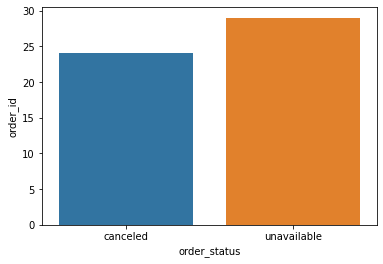

In [17]:
#визуализация
sns.barplot(x='order_status', y='order_id', data=finaly)

In [18]:
#Задание 3 По каждому товару определить, в какой день недели товар чаще всего покупается.
#Чем-то похоже на второе. Разница в том, что не надо статусы брать+другой формат времени
#надо сначала объединить таблицу заказов и товаров
concat=orders_clean.merge(orders_items_clean, on='order_id')
concat['day']=concat.order_purchase_timestamp.dt.strftime('%A')
concat

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-03,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-02,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-02,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday


In [19]:
#Уникальные товары
concat.product_id.nunique()

32951

In [20]:
#Отбор нужных данных. Группировка+счёт заказов
task_3=concat.groupby(['product_id', 'day'], as_index=False)\
.agg({'order_id':'count'})
task_3

,product_id,day,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
61225,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
61226,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
61227,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
61228,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


In [21]:
#Решил сделать пивот+вспомнил про reset_index и idxmax (он нужен, чтобы отобрать дни с максимальным значением заказов)
#В конце переименовал колонку
task_3=task_3.pivot(index='product_id', columns='day', values='order_id')\
.idxmax(axis=1)\
.reset_index()\
.rename(columns={0:'max_day_sell'})
task_3

,product_id,max_day_sell
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Saturday
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


In [22]:
#Задание 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
#Не стоит забывать, что внутри месяца может быть не целое количество недель. 
#Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.
#Опять связка таблиц customers и orders со статусом delivered
task_4=orders_clean.query("order_status=='delivered'")
task_4=task_4.merge(customers_clean, on='customer_id')
task_4=task_4[['order_id','customer_id', 'customer_unique_id', 'order_purchase_timestamp', 'order_status']]
task_4

,order_id,customer_id,customer_unique_id,order_purchase_timestamp,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,delivered
...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,delivered
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,delivered
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,delivered
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,delivered


In [23]:
#Далее работа с датой+группировка и подсчёт заказов
#Здесь загуглил как узнать количество дней в месяце (потом буду делить это число на 7, чтобы получить количество недель)
#Через гугл понял, что нужно использовать dt.daysinmonth
#Чтобы посчитать покупки в неделю нужно будет число заказов в месяц разделить на получившееся число недель в месяце
#Ответ (по сути) будет здесь же
task_4['days_in_month']=(task_4['order_purchase_timestamp'].dt.daysinmonth)/7
task_4
task_4=task_4.groupby(['order_purchase_timestamp', 'customer_unique_id', 'days_in_month'], as_index=False)\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'orders_per_month', 'days_in_month':'weeks_in_month'})
task_4=task_4.groupby(['order_purchase_timestamp', 'customer_unique_id','weeks_in_month'], as_index=False)\
.agg({'orders_per_month':'mean'})
task_4['orders_per_week']=task_4['orders_per_month']/task_4['weeks_in_month']
task_4

,order_purchase_timestamp,customer_unique_id,weeks_in_month,orders_per_month,orders_per_week
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,4.285714,1,0.233333
1,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,4.428571,1,0.225806
2,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,4.428571,1,0.225806
3,2016-10-03 21:13:36,61db744d2f835035a5625b59350c6b63,4.428571,1,0.225806
4,2016-10-03 22:06:03,8d3a54507421dbd2ce0a1d58046826e0,4.428571,1,0.225806
...,...,...,...,...,...
96206,2018-08-29 12:25:59,7a22d14aa3c3599238509ddca4b93b01,4.428571,1,0.225806
96207,2018-08-29 14:18:23,5c58de6fb80e93396e2f35642666b693,4.428571,1,0.225806
96208,2018-08-29 14:18:28,7febafa06d9d8f232a900a2937f04338,4.428571,1,0.225806
96209,2018-08-29 14:52:00,b701bebbdf478f5500348f03aff62121,4.428571,1,0.225806


In [74]:
#Задание 5. Выполните когортный анализ пользователей+
#В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.
#сначала нам надо опреедлить что будет retention. Логичнее всего, что ретеншен рейт в нашем случае, это ситуация, когда закзчик снова сделал покупку/заказ
#Для расчёта опять прибегнем к таблицам заказов и покупателей
retention=orders_clean.merge(customers_clean, on='customer_id')
retention

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-03,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-02,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [36]:
#перепроверил статусы (вспомнил про таблицы, где был только статус доставлен, но забыл, что имя таблицы сейчас дано другое.......)
retention.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [45]:
#Необходимо переформатировать даты, так как по ТЗ задания необходимы 3 месяца (перевод даты в формат месяца).
#Но есть одно НО-когортный анализ делается за 1 год. Значит, для начала нужно будет взять 1 год.
#исходя из наших данных, я понял, что у нас есть полный 2017 год
#Для начала я решил проверить наличие пустых данных (делал это в другом задании, но после загугливания определения покупка понял, что мой подход не верен)
test=retention.query("order_approved_at==''")
test

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,2018-09,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,2018-10,08642cd329066fe11ec63293f714f2f8,33030,santa luzia,MG
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,2017-04,c219f4ac1bc7f1aea33e6ab8885831e8,68742,castanhal,PA
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,2018-09,a8dd81392e5eee5d979c629a76abec2a,13059,campinas,SP
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,2017-05,29dc4aeff866d6a940c471a3ea4faef0,5752,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25,2017-07,40d1c2a6b8ac6ccc102d473ff51cc46d,29156,cariacica,ES
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16,2017-10,aa75afb965e89078d8681fe33aaaeded,12940,atibaia,SP
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,2018-08,13d7bd0b05e18b00f415221b3bb69348,9810,sao bernardo do campo,SP
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,2018-10,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP


In [70]:
#Далее убираю пустые строки. Разница есть-96461 строка против 99441. Отлично
#далее приступаю к приведению нужного формата времени и отбору данных через фильтры и группировку+подсчёты заказов
retention=retention.dropna()
retention

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-03,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-02,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [77]:
need_date=retention.groupby(['customer_unique_id'], as_index=False)\
.agg({'order_approved_at':'min', 'order_id':'count'})\
.rename(columns={'order_approved_at':'fisrt_buy_date', 'order_id':'order_quantity'})
need_date['fisrt_buy_date']=need_date.fisrt_buy_date.dt.strftime('%Y-%m')
need_date

,customer_unique_id,fisrt_buy_date,order_quantity
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
96093,ffff371b4d645b6ecea244b27531430a,2017-02,1
96094,ffff5962728ec6157033ef9805bacc48,2018-05,1


In [82]:
#далее я понял, что мне надо сравнивать даты, поэтому приджойню таблицу retention
#По всей видимости, снова опявились пустые строки. Решил их удалить
total=need_date.merge(retention, on='customer_unique_id')
total=total[['customer_unique_id', 'fisrt_buy_date', 'order_approved_at' ,'order_quantity']]
total=total.dropna()
total['order_approved_at']=total.order_approved_at.dt.strftime('%Y-%m')
total=total.query("'2017-01'<=fisrt_buy_date<='2017-12' and '2017-01'<=order_approved_at<='2017-12' ")
total

,customer_unique_id,fisrt_buy_date,order_approved_at,order_quantity
2,0000f46a3911fa3c0805444483337064,2017-03,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,2017-11,1
8,0005e1862207bf6ccc02e4228effd9a0,2017-03,2017-03,1
10,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07,2017-07,1
...,...,...,...,...
99434,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12,2017-12,1
99436,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2017-06,1
99437,fffea47cd6d3cc0a88bd621562a9d061,2017-12,2017-12,1
99438,ffff371b4d645b6ecea244b27531430a,2017-02,2017-02,1


In [84]:
#Проверка дат (есть ил полный год). Есть, слава богу
total.fisrt_buy_date.unique()

array(['2017-03', '2017-10', '2017-11', '2017-07', '2017-08', '2017-09',
       '2017-12', '2017-01', '2017-04', '2017-06', '2017-02', '2017-05'],
      dtype=object)

In [85]:
#проверка другой даты. Тоже есть
total.order_approved_at.unique()

array(['2017-03', '2017-10', '2017-11', '2017-07', '2017-08', '2017-09',
       '2017-12', '2017-01', '2017-04', '2017-06', '2017-02', '2017-05'],
      dtype=object)

In [145]:
#Далее я понял, что надо формировать когорты, а также посчитать количество уникальных пользователей. Здесь потребуется nunique
total_5=total.groupby(['fisrt_buy_date', 'order_approved_at'], as_index=False)\
.agg({'customer_unique_id':'nunique'})\
.rename(columns={'customer_unique_id':'users_quantity'})
total_5

,fisrt_buy_date,order_approved_at,users_quantity
0,2017-01,2017-01,726
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
72,2017-10,2017-11,30
73,2017-10,2017-12,13
74,2017-11,2017-11,7163
75,2017-11,2017-12,39


In [146]:
#Затем нужно вычесть fisrt_buy_date из order_approved_at. В резульатте будут месяца, с момента покупки+пришлось переводить в формат датавремя
#Далее столкнулся с проблемой. Формат timedelta. Он не удобен, а как перевести в число месяца не помню. Поэтому решил загуглить и здесь нашёл решение :https://stackoverflow.com/questions/51918024/python-timedelta64-convert-days-to-months
total_5['order_approved_at']=pd.to_datetime(total_5['order_approved_at'])
total_5['fisrt_buy_date']=pd.to_datetime(total_5['fisrt_buy_date'])
total_5['need_month']=(total_5.order_approved_at-total_5.fisrt_buy_date)/np.timedelta64(1, 'M')
total_5['need_month']=total_5['need_month'].round(0)#округлил до целого числа
total_5['order_approved_at']=total_5.order_approved_at.dt.strftime('%Y-%m')
total_5['fisrt_buy_date']=total_5.fisrt_buy_date.dt.strftime('%Y-%m')
total_5

,fisrt_buy_date,order_approved_at,users_quantity,need_month
0,2017-01,2017-01,726,0.0
1,2017-01,2017-02,4,1.0
2,2017-01,2017-03,2,2.0
3,2017-01,2017-04,1,3.0
4,2017-01,2017-05,3,4.0
...,...,...,...,...
72,2017-10,2017-11,30,1.0
73,2017-10,2017-12,13,2.0
74,2017-11,2017-11,7163,0.0
75,2017-11,2017-12,39,1.0


In [115]:
total_5.dtypes

fisrt_buy_date        object
order_approved_at     object
users_quantity         int64
need_month           float64
dtype: object

In [147]:
#Теперь нужно привести к виду, похожему на когортный анализ. тут надо сделать пивот
total_5=total_5.pivot(index='fisrt_buy_date', columns='need_month', values='users_quantity').reset_index()
total_5

need_month,fisrt_buy_date,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,2017-01,726.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,2.0,2.0
1,2017-02,1736.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,NaN
2,2017-03,2643.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,NaN,NaN
3,2017-04,2323.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,NaN,NaN,NaN
4,2017-05,3592.0,19.0,18.0,14.0,11.0,12.0,15.0,6.0,NaN,NaN,NaN,NaN
5,2017-06,3148.0,15.0,11.0,13.0,8.0,11.0,12.0,NaN,NaN,NaN,NaN,NaN
6,2017-07,3843.0,20.0,13.0,8.0,13.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-08,4204.0,28.0,15.0,11.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-09,4148.0,27.0,20.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-10,4433.0,30.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#решил посмотреть названия столбцов
total_5.columns


Index(['fisrt_buy_date', 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
       10.0, 11.0],
      dtype='object', name='need_month')

In [139]:
total_5.dtypes

need_month
fisrt_buy_date     object
0.0               float64
1.0               float64
2.0               float64
3.0               float64
4.0               float64
5.0               float64
6.0               float64
7.0               float64
8.0               float64
9.0               float64
10.0              float64
11.0              float64
dtype: object

In [153]:
#далее надо найти когорту с максимальным знаечнием на 3 месяц
#Я решил привести все числовые данные к виду, более подходящему метрике retention
total_5_final=total_5.divide(total_5[0])
total_5_final

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,fisrt_buy_date
0,1.000000,0.002304,0.000757,0.000430,0.000835,0.000318,0.001041,0.000238,0.000241,NaN,0.000279,0.000355,NaN
1,2.391185,0.002304,0.001513,0.001291,0.001949,0.000635,0.001041,0.000714,0.000482,0.000902,0.000279,NaN,NaN
2,3.640496,0.007488,0.003405,0.003874,0.002506,0.001271,0.001041,0.001903,0.001929,0.000677,NaN,NaN,NaN
3,3.199725,0.008065,0.001892,0.001722,0.001949,0.001906,0.002082,0.001427,0.001929,NaN,NaN,NaN,NaN
4,4.947658,0.010945,0.006810,0.006027,0.003062,0.003812,0.003903,0.001427,NaN,NaN,NaN,NaN,NaN
5,4.336088,0.008641,0.004162,0.005596,0.002227,0.003494,0.003123,NaN,NaN,NaN,NaN,NaN,NaN
6,5.293388,0.011521,0.004919,0.003444,0.003619,0.002224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.790634,0.016129,0.005675,0.004735,0.004454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.713499,0.015553,0.007567,0.006027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6.106061,0.017281,0.004919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
#Сопоставив с таблицей, где были даты, я делаю вывод, что это 2017-09
total_5_final[3.0].max()

0.006026689625484288

In [174]:
#Задание 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
#Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
#В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. 
#Подробно опиши, как ты создавал кластеры. 
#Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.
#Буду считать каждую метрику отдельно (благо некоторые наработки есть)
#сделаю один общий датафрейм, где будет вся ифнормация+удалю пустые значения
concat_1=orders_clean.merge(orders_items_clean, on='order_id')
concat_1=concat_1.merge(customers_clean ,on='customer_id')
concat_1=concat_1.dropna()
concat_1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-03,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-02,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-02,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [175]:
#Далее прситупаем к расчётам + timedelta(days=1)
#В ссылке, данной разработчиками курса, нашёл способ вычисления даты с момента последней покупки (решил скомбинировать решение): https://guillaume-martin.github.io/rfm-segmentation-with-python.html 
now = concat_1['order_approved_at'].max()
concat_1=concat_1.groupby(['customer_unique_id'], as_index=False)\
.agg({'price':'sum', 'order_id':'count', 'order_approved_at': lambda x:(now - x.max()).days})
concat_1=concat_1.rename(columns={'price':'M', 'order_id':'F', 'order_approved_at':'R'})
concat_1

,customer_unique_id,M,F,R
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,113
2,0000f46a3911fa3c0805444483337064,69.00,1,536
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,320
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,287
...,...,...,...,...
93337,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,2,446
93338,fffea47cd6d3cc0a88bd621562a9d061,64.89,1,261
93339,ffff371b4d645b6ecea244b27531430a,89.90,1,567
93340,ffff5962728ec6157033ef9805bacc48,115.00,1,118


In [184]:
#далее я приступил к сегментации. Делал всё, как было описано в статье (применил метод ctrl+c + ctrl+v), только решил вставить свои значения
quintiles = concat_1[['R', 'F', 'M']].quantile([0.1, 0.3, 0.6, 0.9]).to_dict()
quintiles

{'R': {0.1: 1.0, 0.3: 2.0, 0.6: 4.0, 0.9: 5.0},
 'F': {0.1: 1.0, 0.3: 1.0, 0.6: 1.0, 0.9: 5.0},
 'M': {0.1: 1.0, 0.3: 2.0, 0.6: 3.0, 0.9: 5.0}}

In [187]:
def r_score(x):
    if x <= quintiles['R'][0.1]:
        return 5
    elif x <= quintiles['R'][0.3]:
        return 4
    elif x <= quintiles['R'][0.6]:
        return 3
    elif x <= quintiles['R'][0.9]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][0.1]:
        return 1
    elif x <= quintiles[c][0.3]:
        return 2
    elif x <= quintiles[c][0.6]:
        return 3
    elif x <= quintiles[c][0.9]:
        return 4
    else:
        return 5    


In [188]:
concat_1['R'] = concat_1['R'].apply(lambda x: r_score(x))
concat_1['F'] = concat_1['F'].apply(lambda x: fm_score(x, 'F'))
concat_1['M'] = concat_1['M'].apply(lambda x: fm_score(x, 'M'))




In [189]:
concat_1['RFM Score'] = concat_1['R'].map(str) + concat_1['F'].map(str) + concat_1['M'].map(str)
concat_1.head()

,customer_unique_id,M,F,R,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,3,314
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,3,311
2,0000f46a3911fa3c0805444483337064,2,1,5,512
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,4,411
4,0004aac84e0df4da2b147fca70cf8255,4,1,4,414
